In [16]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier


In [17]:
df = pd.read_csv("Churn.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [18]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.shape

(10000, 14)

In [20]:
df.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6040,6041,15735358,Dowse,682,Spain,Male,46,NaN,0.00,1,1,1,4654.28,0
9947,9948,15732202,Abramovich,615,France,Male,34,1.0,83503.11,2,1,1,73124.53,1
8016,8017,15759555,Murphy,569,Spain,Male,41,2.0,0.00,2,1,0,134272.57,0
7972,7973,15806929,Ch'ien,751,Germany,Male,36,5.0,73194.99,1,1,1,89222.66,0
9275,9276,15749265,Carslaw,427,Germany,Male,42,1.0,75681.52,1,1,1,57098.00,0
4045,4046,15738516,Kozlova,687,Spain,Female,36,5.0,0.00,1,1,0,17696.22,0
2484,2485,15587735,Chukwuebuka,850,France,Male,39,6.0,96863.13,1,1,1,121681.19,0
6868,6869,15587394,Thomson,462,France,Male,39,4.0,140133.08,2,0,0,131304.45,0
2146,2147,15594349,Streeten,850,France,Male,49,5.0,122486.47,1,0,1,59748.19,0
6199,6200,15750755,Yobachi,449,Spain,Female,33,8.0,0.00,2,0,0,156792.89,0


Completare los valores vacios en Tenure con 0

In [22]:
df[df['Tenure'].isna()]
print(df['Tenure'].describe())
print(df['Tenure'].value_counts())
df['Tenure'].fillna(0, inplace=True)


count    10000.000000
mean         4.543400
std          3.111573
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
Tenure
0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: count, dtype: int64


C:\Users\HL4ev\AppData\Local\Temp\ipykernel_12528\541962544.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(0, inplace=True)


Entrenamos el primer modelo sin hacer ajustes de hiperparametros y obtenemos un F1 score bastante bajo, ya que el umbral es de 0.59. Procedemos a hacer lo necesario para llegar a un valor optimo.
Primero hacemos un normalize para ver lo desbalanceado que estan las clases.

In [24]:
df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
print(target.value_counts(normalize=True))


Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [25]:
df.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8044,8045,15717489,Martin,835,France,Male,23,9.0,0.00,1,1,0,19793.73,1
4966,4967,15682070,Davies,611,France,Male,64,9.0,0.00,2,1,1,53277.15,0
5800,5801,15610379,Barclay-Harvey,599,France,Male,30,9.0,105443.68,1,1,1,121124.53,0
6984,6985,15622631,H?,588,France,Male,44,8.0,154409.74,1,1,0,49324.03,1
8801,8802,15606115,P'eng,510,France,Female,52,0.0,191665.21,1,1,1,131312.56,1
3469,3470,15656096,Cumbrae-Stewart,679,Spain,Female,26,3.0,76554.06,1,1,1,184800.27,0
9453,9454,15769402,Carpenter,667,France,Male,27,7.0,156811.74,1,1,1,149402.59,0
5116,5117,15649536,Wong,741,Germany,Male,38,4.0,128015.83,1,1,0,58440.43,0
1752,1753,15724466,Swearingen,744,Germany,Female,41,2.0,84113.41,1,1,0,197548.63,0
5890,5891,15712777,Kao,482,France,Male,38,0.0,124976.19,1,1,0,35848.12,0


Aqui esta el modelo sin ajustes, y podemos observar que los valores del modelo son bajos, debido al poco balance que existe.

In [28]:
df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train,target_train)
predicted_valid= model.predict(features_valid)
accuracy_valid= accuracy_score(target_valid, predicted_valid)
print(accuracy_valid)
target_pred_constant=pd.Series(0, index=target.index)
print("Accuraccy score: ", accuracy_score(target,target_pred_constant))
print("Matriz de confusion:\n ", confusion_matrix(target_valid, predicted_valid))
print("Recall Score: ", recall_score(target_valid,predicted_valid))
print("Precision Score: ", precision_score(target_valid, predicted_valid))
print("F1 Score: ", f1_score(target_valid, predicted_valid))

0.8176
Accuraccy score:  0.7963
Matriz de confusion:
  [[1779  186]
 [ 270  265]]
Recall Score:  0.4953271028037383
Precision Score:  0.5875831485587583
F1 Score:  0.537525354969574


Ahora empezaremos a hacer un balance, para llegar al mejor valor de f1, hice un sobremuestreo en el modelo, el cual resulto en una mejora en los valores pero no he llegado a la mejora optima.

In [30]:
df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
#En la siguiente funcion hare un sobreentrenamiento para ver que tanto mejora el f1 con este metodo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid= model.predict(features_valid)
accuracy_valid= accuracy_score(target_valid, predicted_valid)
print(accuracy_valid)
target_pred_constant=pd.Series(0, index=target.index)
print("Accuraccy score: ", accuracy_score(target,target_pred_constant))
print("Matriz de confusion:\n ", confusion_matrix(target_valid, predicted_valid))
print("Recall Score: ", recall_score(target_valid,predicted_valid))
print("Precision Score: ", precision_score(target_valid, predicted_valid))
print("F1 Score: ", f1_score(target_valid, predicted_valid))

0.7836
Accuraccy score:  0.7963
Matriz de confusion:
  [[1609  356]
 [ 185  350]]
Recall Score:  0.6542056074766355
Precision Score:  0.49575070821529743
F1 Score:  0.5640612409347301


No obtuvimos los mejores resultados, asi que procedere a hacer la tecnica de subentrenamiento

In [31]:
df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid= model.predict(features_valid)
accuracy_valid= accuracy_score(target_valid, predicted_valid)
print(accuracy_valid)
target_pred_constant=pd.Series(0, index=target.index)
print("Accuraccy score: ", accuracy_score(target,target_pred_constant))
print("Matriz de confusion:\n ", confusion_matrix(target_valid, predicted_valid))
print("Recall Score: ", recall_score(target_valid,predicted_valid))
print("Precision Score: ", precision_score(target_valid, predicted_valid))
print("F1 Score: ", f1_score(target_valid, predicted_valid))

0.6196
Accuraccy score:  0.7963
Matriz de confusion:
  [[1093  872]
 [  79  456]]
Recall Score:  0.8523364485981308
Precision Score:  0.3433734939759036
F1 Score:  0.4895330112721417


Con el subentrenamiento definitivamente los resultados empeoraron para f1, por lo tanto comenzare a hiperparametros para el modelo, para intentar mejorar el f1, tambien sacare el auc-roc que se pide y un plot de la curva roc.

Auc-Roc:  0.7671218282561652


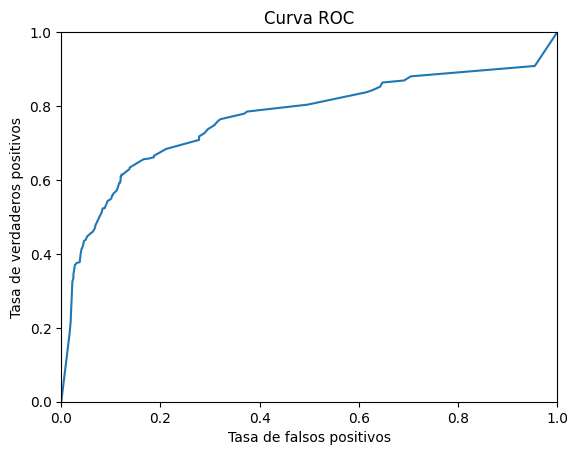

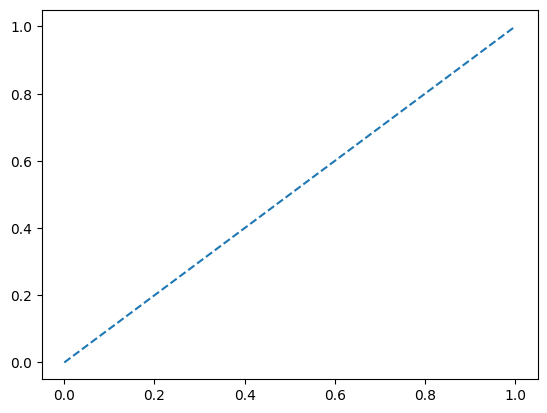

Precision: 0.579, Recall: 0.615, F1 Score: 0.597


In [32]:
df_ohe = pd.get_dummies(df, drop_first=True)
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)
model = DecisionTreeClassifier(random_state=12345,max_depth=12, min_samples_split=14)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.16
precision = precision_score(target_valid, predicted_valid)
recall = recall_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("Auc-Roc: ",auc_roc)
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()
# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.show()
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

CONCLUSION.
El objetivo del proyecto era crear un modelo que alcanzara un F1 score mínimo de 0.59 para predecir el comportamiento de los clientes, específicamente si abandonarían el servicio o no. Tras realizar un análisis detallado y probar diversas técnicas, se logró cumplir con este objetivo, alcanzando un F1 score de 0.597 mediante el uso de un DecisionTreeClassifier con hiperparámetros ajustados y un umbral personalizado de 0.16. Este umbral fue seleccionado porque maximizó el balance entre precisión (0.579) y recall (0.615), lo que es clave para tratar de capturar el mayor número de casos positivos sin comprometer la exactitud.

El modelo también mostró un desempeño sólido en términos de AUC-ROC, con un valor de 0.767, lo que indica que es eficaz para distinguir entre clientes que abandonarán y aquellos que permanecerán. La gráfica de la curva ROC refuerza visualmente este desempeño, mostrando que el modelo está por encima de la línea base aleatoria.

Proceso y Técnicas Utilizadas
Limpieza y Preprocesamiento de Datos:

Los valores faltantes en la variable Tenure se imputaron con 0, dado que representan clientes nuevos sin suficiente historial para calcular esta métrica.
Se utilizaron técnicas como codificación one-hot para convertir las variables categóricas en un formato numérico adecuado para el modelo.
Balanceo del Conjunto de Datos:

Se experimentó con técnicas de sobremuestreo y submuestreo para abordar el desequilibrio en las clases. Esto ayudó a mejorar el desempeño del modelo, especialmente en términos de recall.
Modelado y Ajuste:

El DecisionTreeClassifier fue seleccionado tras probar varios algoritmos. Se ajustaron los hiperparámetros como max_depth y min_samples_split para optimizar el rendimiento.
Se implementó un umbral personalizado de 0.16 para las probabilidades predichas, ajustando el balance entre precisión y recall para maximizar el F1 score.